# Analyzing Results of DP-BERT Finetuning

In [1]:
cd ..

/scratch/ssd001/home/vinithms/clinical_dp_bert/dp_bert/models/official/nlp/bert


In [2]:
%matplotlib inline
# import the dependencies
import pandas as pd
import numpy as np
import h5py
import os
import itertools
import pandas.io.sql as psql


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression

import matplotlib.pyplot as plt
import glob
from IPython.display import display

import copy
from tqdm import tqdm
from ast import literal_eval

In [3]:
ACTIVATIONS=["gelu","tanh"]
TASKS = ['los_3', 'mort_icu', 'readmission_30']
L2_NORM_CLIPS = [0.0, 1.0,5,5.0,10.0,15.0]
NOISE_MULTIPLIERS = [0.0, 0.2,0.4,0.6,0.8, 0.001, 0.01, 1.0]
LEARNING_RATES = ["2e-3", "2e-4", "2e-5", "2e-6", "2e-7"]
EPOCHS = [1,2,3,4,5,6]
RANDOM_SEED = [0, 1, 2, 3 ,4 ,5]
RESULTS_PREFIX = './results/dp_bert_{}/{}/{}_{}/{}/{}/{}/summaries/*.txt'
file_dict = {(activation, task, norm_clip, noise_mult, learning_rate, epochs, random_seed):[] for activation, task, norm_clip, noise_mult, learning_rate, epochs, random_seed in list(itertools.product(ACTIVATIONS, TASKS,
            L2_NORM_CLIPS, NOISE_MULTIPLIERS, LEARNING_RATES, EPOCHS, RANDOM_SEED))}
print(file_dict)

{('gelu', 'los_3', 0.0, 0.0, '2e-3', 1, 0): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 1, 1): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 1, 2): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 1, 3): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 1, 4): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 1, 5): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 2, 0): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 2, 1): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 2, 2): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 2, 3): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 2, 4): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 2, 5): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 3, 0): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 3, 1): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 3, 2): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 3, 3): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 3, 4): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 3, 5): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 4, 0): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 4, 1): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 4, 2): [], ('gelu', 'lo

In [4]:
for activation in ACTIVATIONS:
    for task in TASKS:
        for norm_clip in L2_NORM_CLIPS:
            for noise_mult in NOISE_MULTIPLIERS:
                for learning_rate in LEARNING_RATES:
                    for epoch in EPOCHS:
                        for random in RANDOM_SEED:
                            folder = RESULTS_PREFIX.format(activation, task, norm_clip, noise_mult, learning_rate, epoch, random)
#                             print(folder)
                            text_files = glob.glob(folder)
                            if activation == "tanh":
                                print(folder)
                                print(text_files)
                            file_dict[(activation, task, norm_clip, noise_mult, learning_rate, epoch, random)].extend(text_files)

./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/2/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/2/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/2/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/2/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/2/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/3/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/3/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.0/2e-3/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/lo

./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/2/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/3/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/3/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/3/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/3/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/3/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/4/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/4/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/4/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/4/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/4/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/4/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/5/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/0.0_0.8/2e-4/5/1/summaries/*.txt
[]
./results/dp_bert_tanh/lo

./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/3/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/3/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/3/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/4/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/4/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/4/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/4/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/4/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/4/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/5/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/5/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/5/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/5/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/5/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.0/2e-7/5/5/summaries/*.txt
[]
./results/dp_bert_tanh/lo

./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/4/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/4/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/4/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/4/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/4/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/4/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/5/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/5/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/5/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/5/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/5/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/5/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/1.0_0.001/2e-5/6/2/summaries/*.tx

[]
./results/dp_bert_tanh/los_3/5_0.2/2e-7/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.2/2e-7/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.2/2e-7/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.2/2e-7/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.2/2e-7/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.2/2e-7/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.4/2e-3/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.4/2e-3/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.4/2e-3/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.4/2e-3/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.4/2e-3/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.4/2e-3/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.4/2e-3/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.4/2e-3/2/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.4/2e-3/2/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.4/2e-3/2/3/summarie

./results/dp_bert_tanh/los_3/5_0.001/2e-7/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.001/2e-7/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.001/2e-7/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.001/2e-7/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.001/2e-7/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.01/2e-3/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.01/2e-3/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.01/2e-3/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.01/2e-3/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.01/2e-3/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.01/2e-3/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.01/2e-3/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.01/2e-3/2/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.01/2e-3/2/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.01/2e-3/2/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5_0.01

./results/dp_bert_tanh/los_3/5.0_0.4/2e-4/5/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-4/5/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-4/5/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-4/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-4/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-4/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-4/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-4/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-4/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-5/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-5/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-5/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-5/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-5/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.4/2e-5/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/lo

./results/dp_bert_tanh/los_3/5.0_0.01/2e-6/5/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-6/5/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-6/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-6/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-6/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-6/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-6/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-6/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-7/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-7/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-7/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-7/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-7/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-7/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/5.0_0.01/2e-7/2/0/summaries/*.txt
[]
./results/

[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/3/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/3/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/3/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/4/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/4/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/4/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/4/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/4/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/4/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/5/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/5/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/5/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/5/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_0.6/2e-4/5/4/summaries/*.txt
[]
./resul

./results/dp_bert_tanh/los_3/10.0_1.0/2e-5/5/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-5/5/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-5/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-5/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-5/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-5/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-5/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-5/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-6/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-6/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-6/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-6/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-6/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-6/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/10.0_1.0/2e-6/2/0/summaries/*.txt
[]
./results/

./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/3/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/3/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/3/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/4/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/4/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/4/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/4/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/4/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/4/5/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/5/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/5/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/5/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/5/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_0.6/2e-7/5/4/summaries/*.txt
[]
./results/

./results/dp_bert_tanh/los_3/15.0_1.0/2e-7/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_1.0/2e-7/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_1.0/2e-7/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_1.0/2e-7/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_1.0/2e-7/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/los_3/15.0_1.0/2e-7/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.0/2e-3/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.0/2e-3/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.0/2e-3/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.0/2e-3/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.0/2e-3/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.0/2e-3/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.0/2e-3/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.0/2e-3/2/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.0/2e-3/2/2/summaries/*

./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-4/5/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-4/5/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-4/5/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-4/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-4/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-4/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-4/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-4/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-4/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-5/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-5/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-5/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-5/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-5/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/0.0_0.8/2e-5/1/5

./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/2/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/2/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/2/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/2/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/2/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/3/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/3/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.0/2e-7/3/3

[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-3/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-3/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-3/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-3/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-3/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-3/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-4/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-4/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-4/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-4/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-4/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-4/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-4/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/1.0_0.001/2e-4/2/1/summaries/*.txt
[]
./results/dp_bert

./results/dp_bert_tanh/mort_icu/5_0.2/2e-4/5/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-4/5/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-4/5/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-4/5/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-4/5/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-4/5/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-4/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-4/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-4/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-4/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-4/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-4/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-5/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-5/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.2/2e-5/1/2/summaries/*.txt
[]
./results/

./results/dp_bert_tanh/mort_icu/5_0.001/2e-6/5/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-6/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-6/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-6/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-6/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-6/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-6/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-7/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-7/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-7/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-7/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-7/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-7/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-7/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5_0.001/2e-7/2/1

./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-4/5/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-4/5/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-4/5/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-4/5/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-4/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-4/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-4/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-4/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-4/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-4/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-5/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-5/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-5/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-5/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.4/2e-5/1/4

./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-6/4/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-6/5/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-6/5/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-6/5/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-6/5/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-6/5/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-6/5/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-6/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-6/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-6/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-6/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-6/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-6/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.0_0.01/2e-7/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/5.

./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/2/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/2/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/2/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/3/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/3/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/3/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/3/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/3/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/4/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/4/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/4/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/4/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_0.6/2e-3/4/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10

./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/2/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/2/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/2/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/2/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/2/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/3/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/3/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10.0_1.0/2e-5/3/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/10

./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/2/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/2/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/2/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/2/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/2/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/3/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/3/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/3/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/3/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_0.6/2e-7/3/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15

./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/3/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/3/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/3/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/4/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/4/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/4/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/4/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/4/4/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/4/5/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/5/0/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/5/1/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/5/2/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15.0_1.0/2e-5/5/3/summaries/*.txt
[]
./results/dp_bert_tanh/mort_icu/15

./results/dp_bert_tanh/readmission_30/0.0_0.6/2e-7/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/0.0_0.6/2e-7/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/0.0_0.6/2e-7/2/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/0.0_0.6/2e-7/2/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/0.0_0.6/2e-7/2/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/0.0_0.6/2e-7/2/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/0.0_0.6/2e-7/2/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/0.0_0.6/2e-7/3/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/0.0_0.6/2e-7/3/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/0.0_0.6/2e-7/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/0.0_0.6/2e-7/3/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/0.0_0.6/2e-7/3/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/0.0_0.6/2e-7/3/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/

./results/dp_bert_tanh/readmission_30/1.0_0.0/2e-4/2/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.0/2e-4/2/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.0/2e-4/2/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.0/2e-4/3/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.0/2e-4/3/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.0/2e-4/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.0/2e-4/3/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.0/2e-4/3/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.0/2e-4/3/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.0/2e-4/4/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.0/2e-4/4/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.0/2e-4/4/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.0/2e-4/4/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/

[]
./results/dp_bert_tanh/readmission_30/1.0_0.6/2e-6/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.6/2e-6/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.6/2e-6/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.6/2e-6/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.6/2e-7/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.6/2e-7/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.6/2e-7/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.6/2e-7/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.6/2e-7/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.6/2e-7/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.6/2e-7/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.6/2e-7/2/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_0.6/2e-7/2/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_

./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-3/5/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-3/5/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-3/5/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-3/5/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-3/5/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-3/5/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-3/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-3/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-3/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-3/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-3/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-3/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-4/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/

./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/2/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/2/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/2/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/2/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/3/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/3/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/3/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/3/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/3/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/4/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/4/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/4/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5_0.6/2e-5/4/3/summaries/*

./results/dp_bert_tanh/readmission_30/5.0_0.0/2e-3/3/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.0/2e-3/3/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.0/2e-3/3/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.0/2e-3/4/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.0/2e-3/4/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.0/2e-3/4/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.0/2e-3/4/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.0/2e-3/4/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.0/2e-3/4/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.0/2e-3/5/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.0/2e-3/5/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.0/2e-3/5/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.0/2e-3/5/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/

./results/dp_bert_tanh/readmission_30/5.0_0.8/2e-4/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.8/2e-4/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.8/2e-4/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.8/2e-4/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.8/2e-4/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.8/2e-4/2/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.8/2e-4/2/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.8/2e-4/2/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.8/2e-4/2/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.8/2e-4/2/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.8/2e-4/3/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.8/2e-4/3/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/5.0_0.8/2e-4/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/

./results/dp_bert_tanh/readmission_30/10.0_0.0/2e-3/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.0/2e-3/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.0/2e-3/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.0/2e-3/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.0/2e-3/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.0/2e-4/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.0/2e-4/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.0/2e-4/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.0/2e-4/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.0/2e-4/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.0/2e-4/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.0/2e-4/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.0/2e-4/2/1/summaries/*.txt
[]
./results/dp_bert_tanh/re

./results/dp_bert_tanh/readmission_30/10.0_0.8/2e-6/2/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.8/2e-6/2/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.8/2e-6/2/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.8/2e-6/3/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.8/2e-6/3/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.8/2e-6/3/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.8/2e-6/3/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.8/2e-6/3/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.8/2e-6/3/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.8/2e-6/4/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.8/2e-6/4/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.8/2e-6/4/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/10.0_0.8/2e-6/4/3/summaries/*.txt
[]
./results/dp_bert_tanh/re

./results/dp_bert_tanh/readmission_30/15.0_0.0/2e-7/6/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.0/2e-7/6/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.0/2e-7/6/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.0/2e-7/6/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.0/2e-7/6/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.0/2e-7/6/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.2/2e-3/1/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.2/2e-3/1/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.2/2e-3/1/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.2/2e-3/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.2/2e-3/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.2/2e-3/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.2/2e-3/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/re

./results/dp_bert_tanh/readmission_30/15.0_0.001/2e-5/1/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.001/2e-5/1/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.001/2e-5/1/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.001/2e-5/2/0/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.001/2e-5/2/1/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.001/2e-5/2/2/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.001/2e-5/2/3/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.001/2e-5/2/4/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.001/2e-5/2/5/summaries/*.txt
[]
./results/dp_bert_tanh/readmission_30/15.0_0.001/2e-5/3/0/summaries/*.txt
['./results/dp_bert_tanh/readmission_30/15.0_0.001/2e-5/3/0/summaries/training_summary.txt']
./results/dp_bert_tanh/readmission_30/15.0_0.001/2e-5/3/1/summaries/*.txt
['./results/dp_bert_tanh/readmission_30/15.0_0.001/2e-5/3/1/summar

In [5]:
print(file_dict)

{('gelu', 'los_3', 0.0, 0.0, '2e-3', 1, 0): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 1, 1): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 1, 2): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 1, 3): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 1, 4): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 1, 5): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 2, 0): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 2, 1): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 2, 2): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 2, 3): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 2, 4): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 2, 5): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 3, 0): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 3, 1): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 3, 2): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 3, 3): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 3, 4): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 3, 5): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 4, 0): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 4, 1): [], ('gelu', 'los_3', 0.0, 0.0, '2e-3', 4, 2): [], ('gelu', 'lo

## Create Dataframe

In [6]:
columns=[]
for activation in ACTIVATIONS:
    for task in TASKS:
        for hyperparameters in itertools.product(L2_NORM_CLIPS, NOISE_MULTIPLIERS):
                for measurement in ['AUC']:
                    columns.append((activation, task, hyperparameters, measurement))

index=[(item1, item3, item2) for item1 in range(5) for item2 in EPOCHS for item3 in LEARNING_RATES]
a = np.empty((len(index),len(columns)))
a = np.nan
data=a
ind=pd.MultiIndex.from_tuples(index, names=('seed', 'learning_rate', 'epochs'))
cols=pd.MultiIndex.from_tuples(columns, names=('activation', 'task','hyperparameters','measurement'))
df=pd.DataFrame( index=ind, columns=cols)
cols=pd.MultiIndex.from_tuples(set([(item[0], item[1], item[2], item[3]) for item in columns]), names=('activation', 'task','hyperparameters','measurement'))
df.head()

activation                      gelu                                   \
task                           los_3                                    
hyperparameters           (0.0, 0.0) (0.0, 0.2) (0.0, 0.4) (0.0, 0.6)   
measurement                      AUC        AUC        AUC        AUC   
seed learning_rate epochs                                               
0    2e-3          1             NaN        NaN        NaN        NaN   
     2e-4          1             NaN        NaN        NaN        NaN   
     2e-5          1             NaN        NaN        NaN        NaN   
     2e-6          1             NaN        NaN        NaN        NaN   
     2e-7          1             NaN        NaN        NaN        NaN   

activation                                                                \
task                                                                       
hyperparameters           (0.0, 0.8) (0.0, 0.001) (0.0, 0.01) (0.0, 1.0)   
measurement                      AUC          AUC         AUC        AUC   
seed learning_rate epochs                                                  
0    2e-3          1             NaN          NaN         NaN        NaN   
     2e-4          1             NaN          NaN         NaN        NaN   
     2e-5          1             NaN          NaN         NaN        NaN   
     2e-6          1             NaN          NaN         NaN        NaN   
     2e-7          1             NaN          NaN         NaN        NaN   

activation                                       ...           tanh  \
task                                             ... readmission_30   
hyperparameters           (1.0, 0.0) (1.0, 0.2)  ...   (10.0, 0.01)   
measurement                      AUC        AUC  ...            AUC   
seed learning_rate epochs                        ...                  
0    2e-3          1             NaN        NaN  ...            NaN   
     2e-4          1             NaN        NaN  ...            NaN   
     2e-5          1             NaN        NaN  ...            NaN   
     2e-6          1             NaN        NaN  ...            NaN   
     2e-7          1             NaN        NaN  ...            NaN   

activation                                                                 \
task                                                                        
hyperparameters           (10.0, 1.0) (15.0, 0.0) (15.0, 0.2) (15.0, 0.4)   
measurement                       AUC         AUC         AUC         AUC   
seed learning_rate epochs                                                   
0    2e-3          1              NaN         NaN         NaN         NaN   
     2e-4          1              NaN         NaN         NaN         NaN   
     2e-5          1              NaN         NaN         NaN         NaN   
     2e-6          1              NaN         NaN         NaN         NaN   
     2e-7          1              NaN         NaN         NaN         NaN   

activation                                                                    \
task                                                                           
hyperparameters           (15.0, 0.6) (15.0, 0.8) (15.0, 0.001) (15.0, 0.01)   
measurement                       AUC         AUC           AUC          AUC   
seed learning_rate epochs                                                      
0    2e-3          1              NaN         NaN           NaN          NaN   
     2e-4          1              NaN         NaN           NaN          NaN   
     2e-5          1              NaN         NaN           NaN          NaN   
     2e-6          1              NaN         NaN           NaN          NaN   
     2e-7          1              NaN         NaN           NaN          NaN   

activation                             
task                                   
hyperparameters           (15.0, 1.0)  
measurement                       AUC  
seed learning_rate epochs              
0    2e-3          1     

In [7]:
for activation in ACTIVATIONS:
    for task in TASKS:
        for hyperparameters in itertools.product(L2_NORM_CLIPS, NOISE_MULTIPLIERS):
            for learning_rate in LEARNING_RATES:
                for epoch in EPOCHS:
                    for random in RANDOM_SEED:
                        text_file = file_dict[(activation, task, hyperparameters[0], hyperparameters[1],
                                              learning_rate, epoch, random)]
                        if text_file == []:
                            continue
                        else:
                            print(hyperparameters)
                            text_file=text_file[0]
                            print(text_file)
                        with open(text_file, 'r') as f:
                            f.seek(0)
                            all_lines=f.readlines()
#                             print(all_lines)
                        lines = [line for line in all_lines if "eval" in line]
                        for line in lines:
                            print(line)
                            value=float(line.split(":")[-1].rstrip())
                            df.loc[(int(random),learning_rate, int(epoch)), (activation, task, hyperparameters, measurement)]=value

(0.0, 0.0)
./results/dp_bert_gelu/los_3/0.0_0.0/2e-5/3/0/summaries/training_summary.txt
    "eval_metrics": 0.569929838180542

(0.0, 0.0)
./results/dp_bert_gelu/los_3/0.0_0.0/2e-5/3/1/summaries/training_summary.txt
    "eval_metrics": 0.5464880466461182

(0.0, 0.0)
./results/dp_bert_gelu/los_3/0.0_0.0/2e-5/3/2/summaries/training_summary.txt
    "eval_metrics": 0.5467767715454102

(0.0, 0.0)
./results/dp_bert_gelu/los_3/0.0_0.0/2e-5/3/3/summaries/training_summary.txt
    "eval_metrics": 0.559535026550293

(0.0, 0.0)
./results/dp_bert_gelu/los_3/0.0_0.0/2e-5/3/4/summaries/training_summary.txt
    "eval_metrics": 0.5570967197418213

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-3/1/0/summaries/training_summary.txt
    "eval_AUC": 0.5401355624198914

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-3/1/1/summaries/training_summary.txt
    "eval_AUC": 0.5204046964645386

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-3/1/2/summaries/training_summary.txt
    "eval_AUC": 0.47164946

/pkgs/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/pkgs/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
/pkgs/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3325: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
/pkgs/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):


    "eval_AUC": 0.48602259159088135

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-3/5/0/summaries/training_summary.txt
    "eval_AUC": 0.49213969707489014

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-3/5/1/summaries/training_summary.txt
    "eval_AUC": 0.5230140686035156

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-3/5/2/summaries/training_summary.txt
    "eval_AUC": 0.5137848854064941

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-3/5/3/summaries/training_summary.txt
    "eval_AUC": 0.5251529216766357

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-3/5/4/summaries/training_summary.txt
    "eval_AUC": 0.48264315724372864

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-3/6/0/summaries/training_summary.txt
    "eval_AUC": 0.5074325203895569

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-3/6/1/summaries/training_summary.txt
    "eval_AUC": 0.46015313267707825

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-3/6/2/summaries/training_summary.txt
    

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-6/1/2/summaries/training_summary.txt
    "eval_AUC": 0.4574261009693146

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-6/1/3/summaries/training_summary.txt
    "eval_AUC": 0.4880117177963257

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-6/1/4/summaries/training_summary.txt
    "eval_AUC": 0.5217628479003906

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-6/2/0/summaries/training_summary.txt
    "eval_AUC": 0.5421140789985657

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-6/2/1/summaries/training_summary.txt
    "eval_AUC": 0.5124695301055908

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-6/2/2/summaries/training_summary.txt
    "eval_AUC": 0.5337404608726501

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-6/2/3/summaries/training_summary.txt
    "eval_AUC": 0.4701094627380371

(1.0, 1.0)
./results/dp_bert_gelu/los_3/1.0_1.0/2e-6/2/4/summaries/training_summary.txt
    "eval_AUC": 0.5148436427116394

(1.0, 1.

(5, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-3/4/0/summaries/training_summary.txt
    "eval_AUC": 0.4758523106575012

(5, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-3/4/1/summaries/training_summary.txt
    "eval_AUC": 0.4812850058078766

(5, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-3/4/2/summaries/training_summary.txt
    "eval_AUC": 0.5108439922332764

(5, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-3/4/3/summaries/training_summary.txt
    "eval_AUC": 0.49636393785476685

(5, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-3/4/4/summaries/training_summary.txt
    "eval_AUC": 0.46862301230430603

(5, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-3/5/0/summaries/training_summary.txt
    "eval_AUC": 0.5273024439811707

(5, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-3/5/1/summaries/training_summary.txt
    "eval_AUC": 0.45496639609336853

(5, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-3/5/2/summaries/training_summary.txt
    "eval_AUC": 0.5140416026115417

(5, 0

(5, 0.01)
./results/dp_bert_gelu/los_3/5_0.01/2e-6/3/2/summaries/training_summary.txt
    "eval_AUC": 0.5096675753593445

(5, 0.01)
./results/dp_bert_gelu/los_3/5_0.01/2e-6/3/3/summaries/training_summary.txt
    "eval_AUC": 0.49263161420822144

(5, 0.01)
./results/dp_bert_gelu/los_3/5_0.01/2e-6/3/4/summaries/training_summary.txt
    "eval_AUC": 0.4997219443321228

(5, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-6/4/0/summaries/training_summary.txt
    "eval_AUC": 0.5159130692481995

(5, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-6/4/1/summaries/training_summary.txt
    "eval_AUC": 0.5169610977172852

(5, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-6/4/2/summaries/training_summary.txt
    "eval_AUC": 0.47431233525276184

(5, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-6/4/3/summaries/training_summary.txt
    "eval_AUC": 0.48559480905532837

(5, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-6/4/4/summaries/training_summary.txt
    "eval_AUC": 0.46016380190849304

(5, 0.01)


    "eval_AUC": 0.47132864594459534

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-4/1/2/summaries/training_summary.txt
    "eval_AUC": 0.46075204014778137

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-4/1/3/summaries/training_summary.txt
    "eval_AUC": 0.5462527275085449

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-4/1/4/summaries/training_summary.txt
    "eval_AUC": 0.476558119058609

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-4/2/0/summaries/training_summary.txt
    "eval_AUC": 0.4379197359085083

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-4/2/1/summaries/training_summary.txt
    "eval_AUC": 0.5614920854568481

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-4/2/2/summaries/training_summary.txt
    "eval_AUC": 0.5234953165054321

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-4/2/3/summaries/training_summary.txt
    "eval_AUC": 0.512073814868927

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-4/2/4/summaries/training_summ

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-7/2/0/summaries/training_summary.txt
    "eval_AUC": 0.5542626976966858

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-7/2/1/summaries/training_summary.txt
    "eval_AUC": 0.5290349125862122

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-7/2/2/summaries/training_summary.txt
    "eval_AUC": 0.48719897866249084

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-7/2/3/summaries/training_summary.txt
    "eval_AUC": 0.46779951453208923

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5.0_0.01/2e-7/2/4/summaries/training_summary.txt
    "eval_AUC": 0.536360502243042

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5_0.01/2e-7/3/0/summaries/training_summary.txt
    "eval_AUC": 0.5699619054794312

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5_0.01/2e-7/3/1/summaries/training_summary.txt
    "eval_AUC": 0.49880221486091614

(5.0, 0.01)
./results/dp_bert_gelu/los_3/5_0.01/2e-7/3/2/summaries/training_summary.txt
    "eval_AUC": 0.54603880643844

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-3/3/3/summaries/training_summary.txt
    "eval_AUC": 0.5033686757087708

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-3/3/4/summaries/training_summary.txt
    "eval_AUC": 0.48276081681251526

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-3/4/0/summaries/training_summary.txt
    "eval_AUC": 0.4383581876754761

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-3/4/1/summaries/training_summary.txt
    "eval_AUC": 0.45947936177253723

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-3/4/2/summaries/training_summary.txt
    "eval_AUC": 0.5325426459312439

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-3/4/3/summaries/training_summary.txt
    "eval_AUC": 0.5368096828460693

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-3/4/4/summaries/training_summary.txt
    "eval_AUC": 0.5224793553352356

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-3/5/0/summaries/training_summar

    "eval_AUC": 0.5066090822219849

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-5/6/1/summaries/training_summary.txt
    "eval_AUC": 0.5034114718437195

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-5/6/2/summaries/training_summary.txt
    "eval_AUC": 0.5265324711799622

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-5/6/3/summaries/training_summary.txt
    "eval_AUC": 0.4674144983291626

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-5/6/4/summaries/training_summary.txt
    "eval_AUC": 0.4995187520980835

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-6/1/0/summaries/training_summary.txt
    "eval_AUC": 0.555364191532135

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-6/1/1/summaries/training_summary.txt
    "eval_AUC": 0.5370984077453613

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2e-6/1/2/summaries/training_summary.txt
    "eval_AUC": 0.4440475404262543

(15.0, 0.001)
./results/dp_bert_gelu/los_3/15.0_0.001/2

    "eval_AUC": 0.4888565242290497

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-3/1/1/summaries/training_summary.txt
    "eval_AUC": 0.4458811283111572

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-3/1/2/summaries/training_summary.txt
    "eval_AUC": 0.4502068758010864

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-3/1/3/summaries/training_summary.txt
    "eval_AUC": 0.42961254715919495

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-3/1/4/summaries/training_summary.txt
    "eval_AUC": 0.4927120506763458

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-3/2/0/summaries/training_summary.txt
    "eval_AUC": 0.5399661660194397

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-3/2/1/summaries/training_summary.txt
    "eval_AUC": 0.42053791880607605

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-3/2/2/summaries/training_summary.txt
    "eval_AUC": 0.6500846147537231

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-3/2/3/summaries/tra

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-5/3/0/summaries/training_summary.txt
    "eval_AUC": 0.5589147806167603

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-5/3/1/summaries/training_summary.txt
    "eval_AUC": 0.4463043212890625

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-5/3/2/summaries/training_summary.txt
    "eval_AUC": 0.5780515670776367

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-5/3/3/summaries/training_summary.txt
    "eval_AUC": 0.5920161604881287

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-5/3/4/summaries/training_summary.txt
    "eval_AUC": 0.5746662020683289

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-5/4/0/summaries/training_summary.txt
    "eval_AUC": 0.5648391842842102

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-5/4/1/summaries/training_summary.txt
    "eval_AUC": 0.49802520871162415

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-5/4/2/summaries/training_summary.txt
    "eval_AUC": 0.5

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-7/4/4/summaries/training_summary.txt
    "eval_AUC": 0.6275155544281006

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-7/5/0/summaries/training_summary.txt
    "eval_AUC": 0.4751269221305847

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-7/5/1/summaries/training_summary.txt
    "eval_AUC": 0.5878314971923828

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-7/5/2/summaries/training_summary.txt
    "eval_AUC": 0.519324779510498

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-7/5/3/summaries/training_summary.txt
    "eval_AUC": 0.452369749546051

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-7/5/4/summaries/training_summary.txt
    "eval_AUC": 0.5675662755966187

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-7/6/0/summaries/training_summary.txt
    "eval_AUC": 0.47315216064453125

(1.0, 1.0)
./results/dp_bert_gelu/mort_icu/1.0_1.0/2e-7/6/1/summaries/training_summary.txt
    "eval_AUC": 0.434

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-5/1/2/summaries/training_summary.txt
    "eval_AUC": 0.42641526460647583

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-5/1/3/summaries/training_summary.txt
    "eval_AUC": 0.40046077966690063

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-5/1/4/summaries/training_summary.txt
    "eval_AUC": 0.6265280842781067

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-5/2/0/summaries/training_summary.txt
    "eval_AUC": 0.5613127946853638

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-5/2/1/summaries/training_summary.txt
    "eval_AUC": 0.513635516166687

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-5/2/2/summaries/training_summary.txt
    "eval_AUC": 0.5581154823303223

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-5/2/3/summaries/training_summary.txt
    "eval_AUC": 0.430082768201828

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-5/2/4/summaries/training_summary.txt
    "eval_AUC": 0.46

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/5/4/summaries/training_summary.txt
    "eval_AUC": 0.42049089074134827

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/6/0/summaries/training_summary.txt
    "eval_AUC": 0.48359039425849915

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/6/1/summaries/training_summary.txt
    "eval_AUC": 0.5392138361930847

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/6/2/summaries/training_summary.txt
    "eval_AUC": 0.6019842028617859

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/6/3/summaries/training_summary.txt
    "eval_AUC": 0.4556140601634979

(5, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/6/4/summaries/training_summary.txt
    "eval_AUC": 0.5899943709373474

(5, 1.0)
./results/dp_bert_gelu/mort_icu/5.0_1.0/2e-5/3/0/summaries/training_summary.txt
    "eval_AUC": 0.5276942253112793

(5, 1.0)
./results/dp_bert_gelu/mort_icu/5.0_1.0/2e-5/3/1/summaries/training_summary.txt
    "eval_AUC": 0.3719

    "eval_AUC": 0.3741771876811981

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-4/5/2/summaries/training_summary.txt
    "eval_AUC": 0.45194658637046814

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-4/5/3/summaries/training_summary.txt
    "eval_AUC": 0.42486366629600525

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-4/5/4/summaries/training_summary.txt
    "eval_AUC": 0.44545799493789673

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-4/6/0/summaries/training_summary.txt
    "eval_AUC": 0.43393829464912415

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-4/6/1/summaries/training_summary.txt
    "eval_AUC": 0.4074195623397827

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-4/6/2/summaries/training_summary.txt
    "eval_AUC": 0.5343238115310669

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-4/6/3/summaries/training_summary.txt
    "eval_AUC": 0.42058488726615906

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-

    "eval_AUC": 0.5708105564117432

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/1/1/summaries/training_summary.txt
    "eval_AUC": 0.5230393409729004

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/1/2/summaries/training_summary.txt
    "eval_AUC": 0.3864021301269531

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/1/3/summaries/training_summary.txt
    "eval_AUC": 0.6003855466842651

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/1/4/summaries/training_summary.txt
    "eval_AUC": 0.4408971071243286

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/2/0/summaries/training_summary.txt
    "eval_AUC": 0.3711209297180176

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/2/1/summaries/training_summary.txt
    "eval_AUC": 0.43638330698013306

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/2/2/summaries/training_summary.txt
    "eval_AUC": 0.3735659420490265

(5.0, 0.01)
./results/dp_bert_gelu/mort_icu/5.0_0.01/2e-7/2/

    "eval_AUC": 0.5435866713523865

(15.0, 0.0)
./results/dp_bert_gelu/mort_icu/15.0_0.0/2e-5/3/4/summaries/training_summary.txt
    "eval_AUC": 0.4474327564239502

(15.0, 0.2)
./results/dp_bert_gelu/mort_icu/15.0_0.2/2e-5/3/0/summaries/training_summary.txt
    "eval_AUC": 0.5274590849876404

(15.0, 0.2)
./results/dp_bert_gelu/mort_icu/15.0_0.2/2e-5/3/1/summaries/training_summary.txt
    "eval_AUC": 0.4858943223953247

(15.0, 0.2)
./results/dp_bert_gelu/mort_icu/15.0_0.2/2e-5/3/2/summaries/training_summary.txt
    "eval_AUC": 0.41837501525878906

(15.0, 0.2)
./results/dp_bert_gelu/mort_icu/15.0_0.2/2e-5/3/3/summaries/training_summary.txt
    "eval_AUC": 0.47540906071662903

(15.0, 0.2)
./results/dp_bert_gelu/mort_icu/15.0_0.2/2e-5/3/4/summaries/training_summary.txt
    "eval_AUC": 0.43426743149757385

(15.0, 0.4)
./results/dp_bert_gelu/mort_icu/15.0_0.4/2e-5/3/0/summaries/training_summary.txt
    "eval_AUC": 0.4725409150123596

(15.0, 0.4)
./results/dp_bert_gelu/mort_icu/15.0_0.4/2e-5/

    "eval_AUC": 0.47540903091430664

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-4/5/4/summaries/training_summary.txt
    "eval_AUC": 0.5395900011062622

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-4/6/0/summaries/training_summary.txt
    "eval_AUC": 0.45373332500457764

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-4/6/1/summaries/training_summary.txt
    "eval_AUC": 0.5288696885108948

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-4/6/2/summaries/training_summary.txt
    "eval_AUC": 0.565638542175293

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-4/6/3/summaries/training_summary.txt
    "eval_AUC": 0.5067707300186157

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-4/6/4/summaries/training_summary.txt
    "eval_AUC": 0.4103347957134247

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-5/1/0/summaries/training_summary.txt
    "eval_AUC": 0.5769230723381042

(15.0, 0.001)
./results/dp_bert_

    "eval_AUC": 0.47357532382011414

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-7/1/4/summaries/training_summary.txt
    "eval_AUC": 0.5244498252868652

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-7/2/0/summaries/training_summary.txt
    "eval_AUC": 0.6034888029098511

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-7/2/1/summaries/training_summary.txt
    "eval_AUC": 0.6106826663017273

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-7/2/2/summaries/training_summary.txt
    "eval_AUC": 0.3718262314796448

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-7/2/3/summaries/training_summary.txt
    "eval_AUC": 0.5735377073287964

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-7/2/4/summaries/training_summary.txt
    "eval_AUC": 0.4599868953227997

(15.0, 0.001)
./results/dp_bert_gelu/mort_icu/15.0_0.001/2e-7/3/0/summaries/training_summary.txt
    "eval_AUC": 0.4766315817832947

(15.0, 0.001)
./results/dp_bert_

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-3/6/4/summaries/training_summary.txt
    "eval_AUC": 0.45430561900138855

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-4/1/0/summaries/training_summary.txt
    "eval_AUC": 0.3497783839702606

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-4/1/1/summaries/training_summary.txt
    "eval_AUC": 0.4736703038215637

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-4/1/2/summaries/training_summary.txt
    "eval_AUC": 0.46918535232543945

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-4/1/3/summaries/training_summary.txt
    "eval_AUC": 0.660510778427124

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-4/1/4/summaries/training_summary.txt
    "eval_AUC": 0.36355000734329224

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-4/2/0/summaries/training_summary.txt
    "eval_AUC": 0.5979315638542175

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-4/2/1/s

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-6/3/2/summaries/training_summary.txt
    "eval_AUC": 0.6609328389167786

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-6/3/3/summaries/training_summary.txt
    "eval_AUC": 0.617032527923584

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-6/3/4/summaries/training_summary.txt
    "eval_AUC": 0.6213064789772034

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-6/4/0/summaries/training_summary.txt
    "eval_AUC": 0.5843182802200317

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-6/4/1/summaries/training_summary.txt
    "eval_AUC": 0.3298860490322113

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-6/4/2/summaries/training_summary.txt
    "eval_AUC": 0.4439109265804291

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-6/4/3/summaries/training_summary.txt
    "eval_AUC": 0.41747570037841797

(1.0, 1.0)
./results/dp_bert_gelu/readmission_30/1.0_1.0/2e-6/4/4/sum

    "eval_AUC": 0.552131712436676

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/5/0/summaries/training_summary.txt
    "eval_AUC": 0.5146158933639526

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/5/2/summaries/training_summary.txt
    "eval_AUC": 0.4681299924850464

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/5/3/summaries/training_summary.txt
    "eval_AUC": 0.5315533876419067

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/5/4/summaries/training_summary.txt
    "eval_AUC": 0.5133494734764099

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/6/0/summaries/training_summary.txt
    "eval_AUC": 0.4255487322807312

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/6/1/summaries/training_summary.txt
    "eval_AUC": 0.4512979984283447

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/6/2/summaries/training_summary.txt
    "eval_AUC": 0.482745885848999

(5, 0.01)
./results/dp_bert_gelu/re

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5_0.01/2e-6/3/3/summaries/training_summary.txt
    "eval_AUC": 0.4346243143081665

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5_0.01/2e-6/3/4/summaries/training_summary.txt
    "eval_AUC": 0.5810996294021606

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-6/4/0/summaries/training_summary.txt
    "eval_AUC": 0.5708104968070984

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-6/4/1/summaries/training_summary.txt
    "eval_AUC": 0.37521106004714966

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-6/4/2/summaries/training_summary.txt
    "eval_AUC": 0.6123363971710205

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-6/4/3/summaries/training_summary.txt
    "eval_AUC": 0.28049808740615845

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-6/4/4/summaries/training_summary.txt
    "eval_AUC": 0.6101731061935425

(5, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-6/5/0/summa

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/4/1/summaries/training_summary.txt
    "eval_AUC": 0.5040101408958435

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/4/2/summaries/training_summary.txt
    "eval_AUC": 0.4509286880493164

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/4/3/summaries/training_summary.txt
    "eval_AUC": 0.43082523345947266

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/4/4/summaries/training_summary.txt
    "eval_AUC": 0.552131712436676

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/5/0/summaries/training_summary.txt
    "eval_AUC": 0.5146158933639526

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/5/2/summaries/training_summary.txt
    "eval_AUC": 0.4681299924850464

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-3/5/3/summaries/training_summary.txt
    "eval_AUC": 0.5315533876419067

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0

    "eval_AUC": 0.4767834544181824

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-6/1/1/summaries/training_summary.txt
    "eval_AUC": 0.6116504669189453

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-6/1/2/summaries/training_summary.txt
    "eval_AUC": 0.3876635730266571

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-6/1/3/summaries/training_summary.txt
    "eval_AUC": 0.3190692365169525

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-6/1/4/summaries/training_summary.txt
    "eval_AUC": 0.527490496635437

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-6/2/0/summaries/training_summary.txt
    "eval_AUC": 0.6672646999359131

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-6/2/1/summaries/training_summary.txt
    "eval_AUC": 0.64515620470047

(5.0, 0.01)
./results/dp_bert_gelu/readmission_30/5.0_0.01/2e-6/2/2/summaries/training_summary.txt
    "eval_AUC": 0.4807935953140259

(5.0, 0.01)
./results/

    "eval_AUC": 0.6158716678619385

(10.0, 0.0)
./results/dp_bert_gelu/readmission_30/10.0_0.0/2e-5/3/4/summaries/training_summary.txt
    "eval_AUC": 0.5173596143722534

(10.0, 0.2)
./results/dp_bert_gelu/readmission_30/10.0_0.2/2e-5/3/0/summaries/training_summary.txt
    "eval_AUC": 0.5861123204231262

(10.0, 0.2)
./results/dp_bert_gelu/readmission_30/10.0_0.2/2e-5/3/1/summaries/training_summary.txt
    "eval_AUC": 0.6055297255516052

(10.0, 0.2)
./results/dp_bert_gelu/readmission_30/10.0_0.2/2e-5/3/2/summaries/training_summary.txt
    "eval_AUC": 0.47926339507102966

(10.0, 0.2)
./results/dp_bert_gelu/readmission_30/10.0_0.2/2e-5/3/3/summaries/training_summary.txt
    "eval_AUC": 0.4440164566040039

(10.0, 0.2)
./results/dp_bert_gelu/readmission_30/10.0_0.2/2e-5/3/4/summaries/training_summary.txt
    "eval_AUC": 0.6494829058647156

(10.0, 0.4)
./results/dp_bert_gelu/readmission_30/10.0_0.4/2e-5/3/0/summaries/training_summary.txt
    "eval_AUC": 0.6368193626403809

(10.0, 0.4)
./resu

./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-4/4/3/summaries/training_summary.txt
    "eval_AUC": 0.39716124534606934

(15.0, 0.001)
./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-4/4/4/summaries/training_summary.txt
    "eval_AUC": 0.42602360248565674

(15.0, 0.001)
./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-4/5/0/summaries/training_summary.txt
    "eval_AUC": 0.47926339507102966

(15.0, 0.001)
./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-4/5/1/summaries/training_summary.txt
    "eval_AUC": 0.3681405782699585

(15.0, 0.001)
./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-4/5/2/summaries/training_summary.txt
    "eval_AUC": 0.4999472498893738

(15.0, 0.001)
./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-4/5/3/summaries/training_summary.txt
    "eval_AUC": 0.5409982800483704

(15.0, 0.001)
./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-4/5/4/summaries/training_summary.txt
    "eval_AUC": 0.6425707340240479

(15.0, 0.001)
./results/dp_bert_gelu/r

(15.0, 0.001)
./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-6/6/2/summaries/training_summary.txt
    "eval_AUC": 0.3627585768699646

(15.0, 0.001)
./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-6/6/3/summaries/training_summary.txt
    "eval_AUC": 0.43831783533096313

(15.0, 0.001)
./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-6/6/4/summaries/training_summary.txt
    "eval_AUC": 0.4533558487892151

(15.0, 0.001)
./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-7/1/0/summaries/training_summary.txt
    "eval_AUC": 0.38243985176086426

(15.0, 0.001)
./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-7/1/1/summaries/training_summary.txt
    "eval_AUC": 0.4075559377670288

(15.0, 0.001)
./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-7/1/2/summaries/training_summary.txt
    "eval_AUC": 0.5222668051719666

(15.0, 0.001)
./results/dp_bert_gelu/readmission_30/15.0_0.001/2e-7/1/3/summaries/training_summary.txt
    "eval_AUC": 0.41130220890045166

(15.0, 0.001)
./results/

(1.0, 1.0)
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-5/3/0/summaries/training_summary.txt
    "eval_AUC": 0.3882967233657837

(1.0, 1.0)
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-5/3/1/summaries/training_summary.txt
    "eval_AUC": 0.6128113269805908

(1.0, 1.0)
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-5/3/2/summaries/training_summary.txt
    "eval_AUC": 0.37626636028289795

(1.0, 1.0)
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-5/3/3/summaries/training_summary.txt
    "eval_AUC": 0.36476361751556396

(1.0, 1.0)
./results/dp_bert_tanh/readmission_30/1.0_1.0/2e-5/3/4/summaries/training_summary.txt
    "eval_AUC": 0.4454938471317291

(5, 0.01)
./results/dp_bert_tanh/readmission_30/5.0_0.01/2e-5/3/0/summaries/training_summary.txt
    "eval_AUC": 0.3923596441745758

(5, 0.01)
./results/dp_bert_tanh/readmission_30/5.0_0.01/2e-5/3/1/summaries/training_summary.txt
    "eval_AUC": 0.464489221572876

(5, 0.01)
./results/dp_bert_tanh/readmission_30/5.0_0.01/2e-5/3/2/su

In [9]:
df

activation                      gelu                                   \
task                           los_3                                    
hyperparameters           (0.0, 0.0) (0.0, 0.2) (0.0, 0.4) (0.0, 0.6)   
measurement                      AUC        AUC        AUC        AUC   
seed learning_rate epochs                                               
0    2e-3          1             NaN        NaN        NaN        NaN   
     2e-4          1             NaN        NaN        NaN        NaN   
     2e-5          1             NaN        NaN        NaN        NaN   
     2e-6          1             NaN        NaN        NaN        NaN   
     2e-7          1             NaN        NaN        NaN        NaN   
     2e-3          2             NaN        NaN        NaN        NaN   
     2e-4          2             NaN        NaN        NaN        NaN   
     2e-5          2             NaN        NaN        NaN        NaN   
     2e-6          2             NaN        NaN        NaN        NaN   
     2e-7          2             NaN        NaN        NaN        NaN   
     2e-3          3             NaN        NaN        NaN        NaN   
     2e-4          3             NaN        NaN        NaN        NaN   
     2e-5          3         0.56993        NaN        NaN        NaN   
     2e-6          3             NaN        NaN        NaN        NaN   
     2e-7          3             NaN        NaN        NaN        NaN   
     2e-3          4             NaN        NaN        NaN        NaN   
     2e-4          4             NaN        NaN        NaN        NaN   
     2e-5          4             NaN        NaN        NaN        NaN   
     2e-6          4             NaN        NaN        NaN        NaN   
     2e-7          4             NaN        NaN        NaN        NaN   
     2e-3          5             NaN        NaN        NaN        NaN   
     2e-4          5             NaN        NaN        NaN        NaN   
     2e-5          5             NaN        NaN        NaN        NaN   
     2e-6          5             NaN        NaN        NaN        NaN   
     2e-7          5             NaN        NaN        NaN        NaN   
     2e-3          6             NaN        NaN        NaN        NaN   
     2e-4          6             NaN        NaN        NaN        NaN   
     2e-5          6             NaN        NaN        NaN        NaN   
     2e-6          6             NaN        NaN        NaN        NaN   
     2e-7          6             NaN        NaN        NaN        NaN   
...                              ...        ...        ...        ...   
4    2e-3          1             NaN        NaN        NaN        NaN   
     2e-4          1             NaN        NaN        NaN        NaN   
     2e-5          1             NaN        NaN        NaN        NaN   
     2e-6          1             NaN        NaN        NaN        NaN   
     2e-7          1             NaN        NaN        NaN        NaN   
     2e-3          2             NaN        NaN        NaN        NaN   
     2e-4          2             NaN        NaN        NaN        NaN   
     2e-5          2             NaN        NaN        NaN        NaN   
     2e-6          2             NaN        NaN        NaN        NaN   
     2e-7          2             NaN        NaN        NaN        NaN   
     2e-3          3             NaN        NaN        NaN        NaN   
     2e-4          3             NaN        NaN        NaN        NaN   
     2e-5          3        0.557097        NaN        NaN        NaN   
     2e-6          3             NaN        NaN        NaN        NaN   
     2e-7          3             NaN        NaN        NaN        NaN   
     2e-3          4             NaN        NaN        NaN        NaN   
     2e-4          4             NaN        NaN        NaN        NaN   
     2e-5          4             NaN        NaN        NaN        NaN   
     2e-6          4             NaN        NaN        NaN

In [10]:
df.head()

activation                      gelu                                   \
task                           los_3                                    
hyperparameters           (0.0, 0.0) (0.0, 0.2) (0.0, 0.4) (0.0, 0.6)   
measurement                      AUC        AUC        AUC        AUC   
seed learning_rate epochs                                               
0    2e-3          1             NaN        NaN        NaN        NaN   
     2e-4          1             NaN        NaN        NaN        NaN   
     2e-5          1             NaN        NaN        NaN        NaN   
     2e-6          1             NaN        NaN        NaN        NaN   
     2e-7          1             NaN        NaN        NaN        NaN   

activation                                                                \
task                                                                       
hyperparameters           (0.0, 0.8) (0.0, 0.001) (0.0, 0.01) (0.0, 1.0)   
measurement                      AUC          AUC         AUC        AUC   
seed learning_rate epochs                                                  
0    2e-3          1             NaN          NaN         NaN        NaN   
     2e-4          1             NaN          NaN         NaN        NaN   
     2e-5          1             NaN          NaN         NaN        NaN   
     2e-6          1             NaN          NaN         NaN        NaN   
     2e-7          1             NaN          NaN         NaN        NaN   

activation                                       ...           tanh  \
task                                             ... readmission_30   
hyperparameters           (1.0, 0.0) (1.0, 0.2)  ...   (10.0, 0.01)   
measurement                      AUC        AUC  ...            AUC   
seed learning_rate epochs                        ...                  
0    2e-3          1             NaN        NaN  ...            NaN   
     2e-4          1             NaN        NaN  ...            NaN   
     2e-5          1             NaN        NaN  ...            NaN   
     2e-6          1             NaN        NaN  ...            NaN   
     2e-7          1             NaN        NaN  ...            NaN   

activation                                                                 \
task                                                                        
hyperparameters           (10.0, 1.0) (15.0, 0.0) (15.0, 0.2) (15.0, 0.4)   
measurement                       AUC         AUC         AUC         AUC   
seed learning_rate epochs                                                   
0    2e-3          1              NaN         NaN         NaN         NaN   
     2e-4          1              NaN         NaN         NaN         NaN   
     2e-5          1              NaN         NaN         NaN         NaN   
     2e-6          1              NaN         NaN         NaN         NaN   
     2e-7          1              NaN         NaN         NaN         NaN   

activation                                                                    \
task                                                                           
hyperparameters           (15.0, 0.6) (15.0, 0.8) (15.0, 0.001) (15.0, 0.01)   
measurement                       AUC         AUC           AUC          AUC   
seed learning_rate epochs                                                      
0    2e-3          1              NaN         NaN           NaN          NaN   
     2e-4          1              NaN         NaN           NaN          NaN   
     2e-5          1              NaN         NaN           NaN          NaN   
     2e-6          1              NaN         NaN           NaN          NaN   
     2e-7          1              NaN         NaN           NaN          NaN   

activation                             
task                                   
hyperparameters           (15.0, 1.0)  
measurement                       AUC  
seed learning_rate epochs              
0    2e-3          1     

In [11]:
df.dropna(axis='columns',how='all', inplace=True)

In [12]:
df

activation                      gelu                                           \
task                           los_3                                            
hyperparameters           (0.0, 0.0) (1.0, 1.0) (5, 0.01)  (5, 1.0) (5, 0.01)   
measurement                      AUC        AUC       AUC       AUC       AUC   
seed learning_rate epochs                                                       
0    2e-3          1             NaN   0.540136  0.480023       NaN  0.480023   
     2e-4          1             NaN   0.517196  0.456923       NaN  0.456923   
     2e-5          1             NaN   0.558861  0.484461       NaN  0.484461   
     2e-6          1             NaN   0.444614  0.532297       NaN  0.532297   
     2e-7          1             NaN   0.470922  0.550477       NaN  0.550477   
     2e-3          2             NaN   0.511785   0.51895       NaN   0.51895   
     2e-4          2             NaN   0.537334   0.43792       NaN   0.43792   
     2e-5          2             NaN   0.489349   0.43716       NaN   0.43716   
     2e-6          2             NaN   0.542114  0.527078       NaN  0.527078   
     2e-7          2             NaN   0.532393  0.554263       NaN  0.554263   
     2e-3          3             NaN   0.461105  0.565973       NaN  0.565973   
     2e-4          3             NaN   0.560326  0.477521       NaN  0.477521   
     2e-5          3         0.56993   0.493541  0.420435  0.488108  0.420435   
     2e-6          3             NaN   0.464869  0.456293       NaN  0.456293   
     2e-7          3             NaN    0.49137  0.569962       NaN  0.569962   
     2e-3          4             NaN   0.515838  0.475852       NaN  0.475852   
     2e-4          4             NaN   0.463843  0.506748       NaN  0.506748   
     2e-5          4             NaN   0.464174  0.516127       NaN  0.516127   
     2e-6          4             NaN   0.487359  0.515913       NaN  0.515913   
     2e-7          4             NaN   0.512309  0.557311       NaN  0.557311   
     2e-3          5             NaN    0.49214  0.527302       NaN  0.527302   
     2e-4          5             NaN   0.534863  0.450571       NaN  0.450571   
     2e-5          5             NaN   0.556113  0.471992       NaN  0.471992   
     2e-6          5             NaN   0.534297  0.458977       NaN  0.458977   
     2e-7          5             NaN   0.479392       NaN       NaN       NaN   
     2e-3          6             NaN   0.507433  0.480975       NaN  0.480975   
     2e-4          6             NaN   0.510234  0.541986       NaN  0.541986   
     2e-5          6             NaN   0.501904   0.47659       NaN   0.47659   
     2e-6          6             NaN   0.540606  0.470912       NaN  0.470912   
     2e-7          6             NaN   0.472323  0.498171       NaN  0.498171   
...                              ...        ...       ...       ...       ...   
4    2e-3          1             NaN    0.49138  0.501241       NaN  0.501241   
     2e-4          1             NaN   0.486964  0.476558       NaN  0.476558   
     2e-5          1             NaN   0.504427  0.473018       NaN  0.473018   
     2e-6          1             NaN   0.521763   0.45333       NaN   0.45333   
     2e-7          1             NaN   0.479135  0.429279       NaN  0.429279   
     2e-3          2             NaN   0.480002  0.479114       NaN  0.479114   
     2e-4          2             NaN   0.550167  0.503978       NaN  0.503978   
     2e-5          2             NaN   0.426573  0.508128       NaN  0.508128   
     2e-6          2             NaN   0.514844  0.489755       NaN  0.489755   
     2e-7          2             NaN   0.475382  0.536361       NaN  0.536361   
     2e-3          3             NaN    0.50477  0.481627       NaN  0.481627   
     2e-4          3             NaN   0.541804  0.507689       NaN  0.507689   
     2e-5          3        0.557097   0.484557  0.464837  0.520544  0.464837   
     2e-6          3           

In [13]:
df=df.apply(pd.to_numeric, errors='coerce')

In [14]:
metric='AUC'
averaged_df=df.groupby(['learning_rate', 'epochs']).mean().loc[:, (slice(None), slice(None),slice(None), metric)]
ste_df=df.groupby(['learning_rate', 'epochs']).std().loc[:, (slice(None), slice(None),slice(None), metric)]/np.sqrt(5)
print(averaged_df.columns)
averaged_df.columns = averaged_df.columns.droplevel(-1)
ste_df.columns = ste_df.columns.droplevel(-1)

MultiIndex(levels=[['gelu', 'tanh'], ['los_3', 'mort_icu', 'readmission_30'], [(0.0, 0.0), (0.0, 0.001), (0.0, 0.01), (0.0, 0.2), (0.0, 0.4), (0.0, 0.6), (0.0, 0.8), (0.0, 1.0), (1.0, 0.0), (1.0, 0.001), (1.0, 0.01), (1.0, 0.2), (1.0, 0.4), (1.0, 0.6), (1.0, 0.8), (1.0, 1.0), (5, 0.0), (5, 0.001), (5, 0.01), (5, 0.2), (5, 0.4), (5, 0.6), (5, 0.8), (5, 1.0), (10.0, 0.0), (10.0, 0.001), (10.0, 0.01), (10.0, 0.2), (10.0, 0.4), (10.0, 0.6), (10.0, 0.8), (10.0, 1.0), (15.0, 0.0), (15.0, 0.001), (15.0, 0.01), (15.0, 0.2), (15.0, 0.4), (15.0, 0.6), (15.0, 0.8), (15.0, 1.0)], ['AUC']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2], [0,

In [16]:
averaged_df.loc[('2e-5', slice(None)), ('gelu', slice(None),slice(None))]

activation                 gelu                                           \
task                      los_3                                            
hyperparameters      (0.0, 0.0) (1.0, 1.0) (5, 0.01)  (5, 1.0) (5, 0.01)   
learning_rate epochs                                                       
2e-5          1             NaN   0.497906  0.473724       NaN  0.473724   
              2             NaN   0.460739  0.461764       NaN  0.461764   
              3        0.555965   0.477542  0.486189  0.507751  0.486189   
              4             NaN   0.452573  0.474603       NaN  0.474603   
              5             NaN   0.496488  0.477152       NaN  0.477152   
              6             NaN   0.508072  0.496090       NaN  0.496090   

activation                                                          \
task                                                                 
hyperparameters       (5, 1.0) (10.0, 0.0) (10.0, 0.2) (10.0, 0.4)   
learning_rate epochs                                                 
2e-5          1            NaN         NaN         NaN         NaN   
              2            NaN         NaN         NaN         NaN   
              3       0.507751    0.523908    0.484885    0.504594   
              4            NaN         NaN         NaN         NaN   
              5            NaN         NaN         NaN         NaN   
              6            NaN         NaN         NaN         NaN   

activation                        ...                                       \
task                              ... readmission_30                         
hyperparameters      (10.0, 0.6)  ...      (5, 0.01)  (5, 1.0) (10.0, 0.0)   
learning_rate epochs              ...                                        
2e-5          1              NaN  ...       0.510152       NaN         NaN   
              2              NaN  ...       0.485775       NaN         NaN   
              3         0.496176  ...       0.496834  0.550232    0.527986   
              4              NaN  ...       0.558411       NaN         NaN   
              5              NaN  ...       0.444386       NaN         NaN   
              6              NaN  ...       0.549335       NaN         NaN   

activation                                                            \
task                                                                   
hyperparameters      (10.0, 0.2) (10.0, 0.4) (10.0, 0.6) (10.0, 0.8)   
learning_rate epochs                                                   
2e-5          1              NaN         NaN         NaN         NaN   
              2              NaN         NaN         NaN         NaN   
              3         0.552881    0.547573    0.462168    0.457123   
              4              NaN         NaN         NaN         NaN   
              5              NaN         NaN         NaN         NaN   
              6              NaN         NaN         NaN         NaN   

activation                                                  
task                                                        
hyperparameters      (10.0, 1.0) (15.0, 0.001) (15.0, 1.0)  
learning_rate epochs                                        
2e-5          1              NaN      0.477923         NaN  
              2              NaN      0.507661         NaN  
              3          0.53684      0.541114    0.538793  
              4              NaN      0.447499         NaN  
              5              NaN      0.429116         NaN  
              6              NaN      0.478092         NaN  

[6 rows x 51 columns]

In [18]:
ste_df.loc[('2e-5', slice(None)), ('tanh', slice(None),slice(None))]

activation                 tanh                                               \
task                      los_3                                     mort_icu   
hyperparameters      (1.0, 1.0) (5, 0.01) (5, 0.01) (15.0, 0.001) (1.0, 1.0)   
learning_rate epochs                                                           
2e-5          1             NaN       NaN       NaN           NaN        NaN   
              2             NaN       NaN       NaN           NaN        NaN   
              3        0.004214  0.020511  0.020511      0.012679   0.017355   
              4             NaN       NaN       NaN           NaN        NaN   
              5             NaN       NaN       NaN           NaN        NaN   
              6             NaN       NaN       NaN           NaN        NaN   

activation                                                             \
task                                                   readmission_30   
hyperparameters      (5, 0.01) (5, 0.01) (15.0, 0.001)     (1.0, 1.0)   
learning_rate epochs                                                    
2e-5          1            NaN       NaN           NaN            NaN   
              2            NaN       NaN           NaN            NaN   
              3       0.022122  0.022122      0.028874       0.045967   
              4            NaN       NaN           NaN            NaN   
              5            NaN       NaN           NaN            NaN   
              6            NaN       NaN           NaN            NaN   

activation                                              
task                                                    
hyperparameters      (5, 0.01) (5, 0.01) (15.0, 0.001)  
learning_rate epochs                                    
2e-5          1            NaN       NaN           NaN  
              2            NaN       NaN           NaN  
              3       0.024757  0.024757      0.036468  
              4            NaN       NaN           NaN  
              5            NaN       NaN           NaN  
              6            NaN       NaN           NaN

## Plotting Effect of Learning Rate

In [214]:
TRAIN_STYLES    = ['SGD', 'DP-SGD']
MODEL_TYPES     = ['lr', 'lstm', 'grud']
METRIC = ['AUROC', 'AUPRC']
HYPERPARAMETER_PAIRS = [(15, 0.001), (5.0, 0.01), (1.0, 1.0)]
epoch = 3
activation = "gelu"
NAMES = {
    'SGD': 'SGD',
    'DP-SGD': 'DP-SGD',
    'lr': 'Logistic Regression',
    'lstm': 'LSTM',
    'grud': 'GRU-D',
    (15,0.001): 'Low',
    (5.0,0.01): 'Medium',
    (1.0,1.0): 'High',
}

[0.  0.2 0.4 0.6 0.8 1. ]
(15, 0.001)
[0.49305084 0.47729605 0.48765024 0.4951234  0.49792529]
<ErrorbarContainer object of 3 artists>
(5.0, 0.01)
[0.51433888 0.50583693 0.4861894  0.49733498 0.51208878]
<ErrorbarContainer object of 3 artists>
(1.0, 1.0)
[0.46723061 0.50121914 0.47754201 0.48676046 0.53324634]
<ErrorbarContainer object of 3 artists>
(15, 0.001)
[0.51140682 0.5386214  0.49623848 0.53770925 0.49369007]
<ErrorbarContainer object of 3 artists>
(5.0, 0.01)
[0.50891483 0.4272428  0.48515139 0.48492571 0.51256348]
<ErrorbarContainer object of 3 artists>
(1.0, 1.0)
[0.4789825  0.5098646  0.54999061 0.50587738 0.48025203]
<ErrorbarContainer object of 3 artists>
(15, 0.001)
[0.53698817 0.51119671 0.54111438 0.51334953 0.51930138]
<ErrorbarContainer object of 3 artists>
(5.0, 0.01)
[0.53007597 0.52180244 0.49683412 0.47525327 0.40312368]
<ErrorbarContainer object of 3 artists>
(1.0, 1.0)
[0.47670957 0.48861333 0.54748839 0.57834528 0.54110384]
<ErrorbarContainer object of 3 artis

<Figure size 1200x800 with 0 Axes>

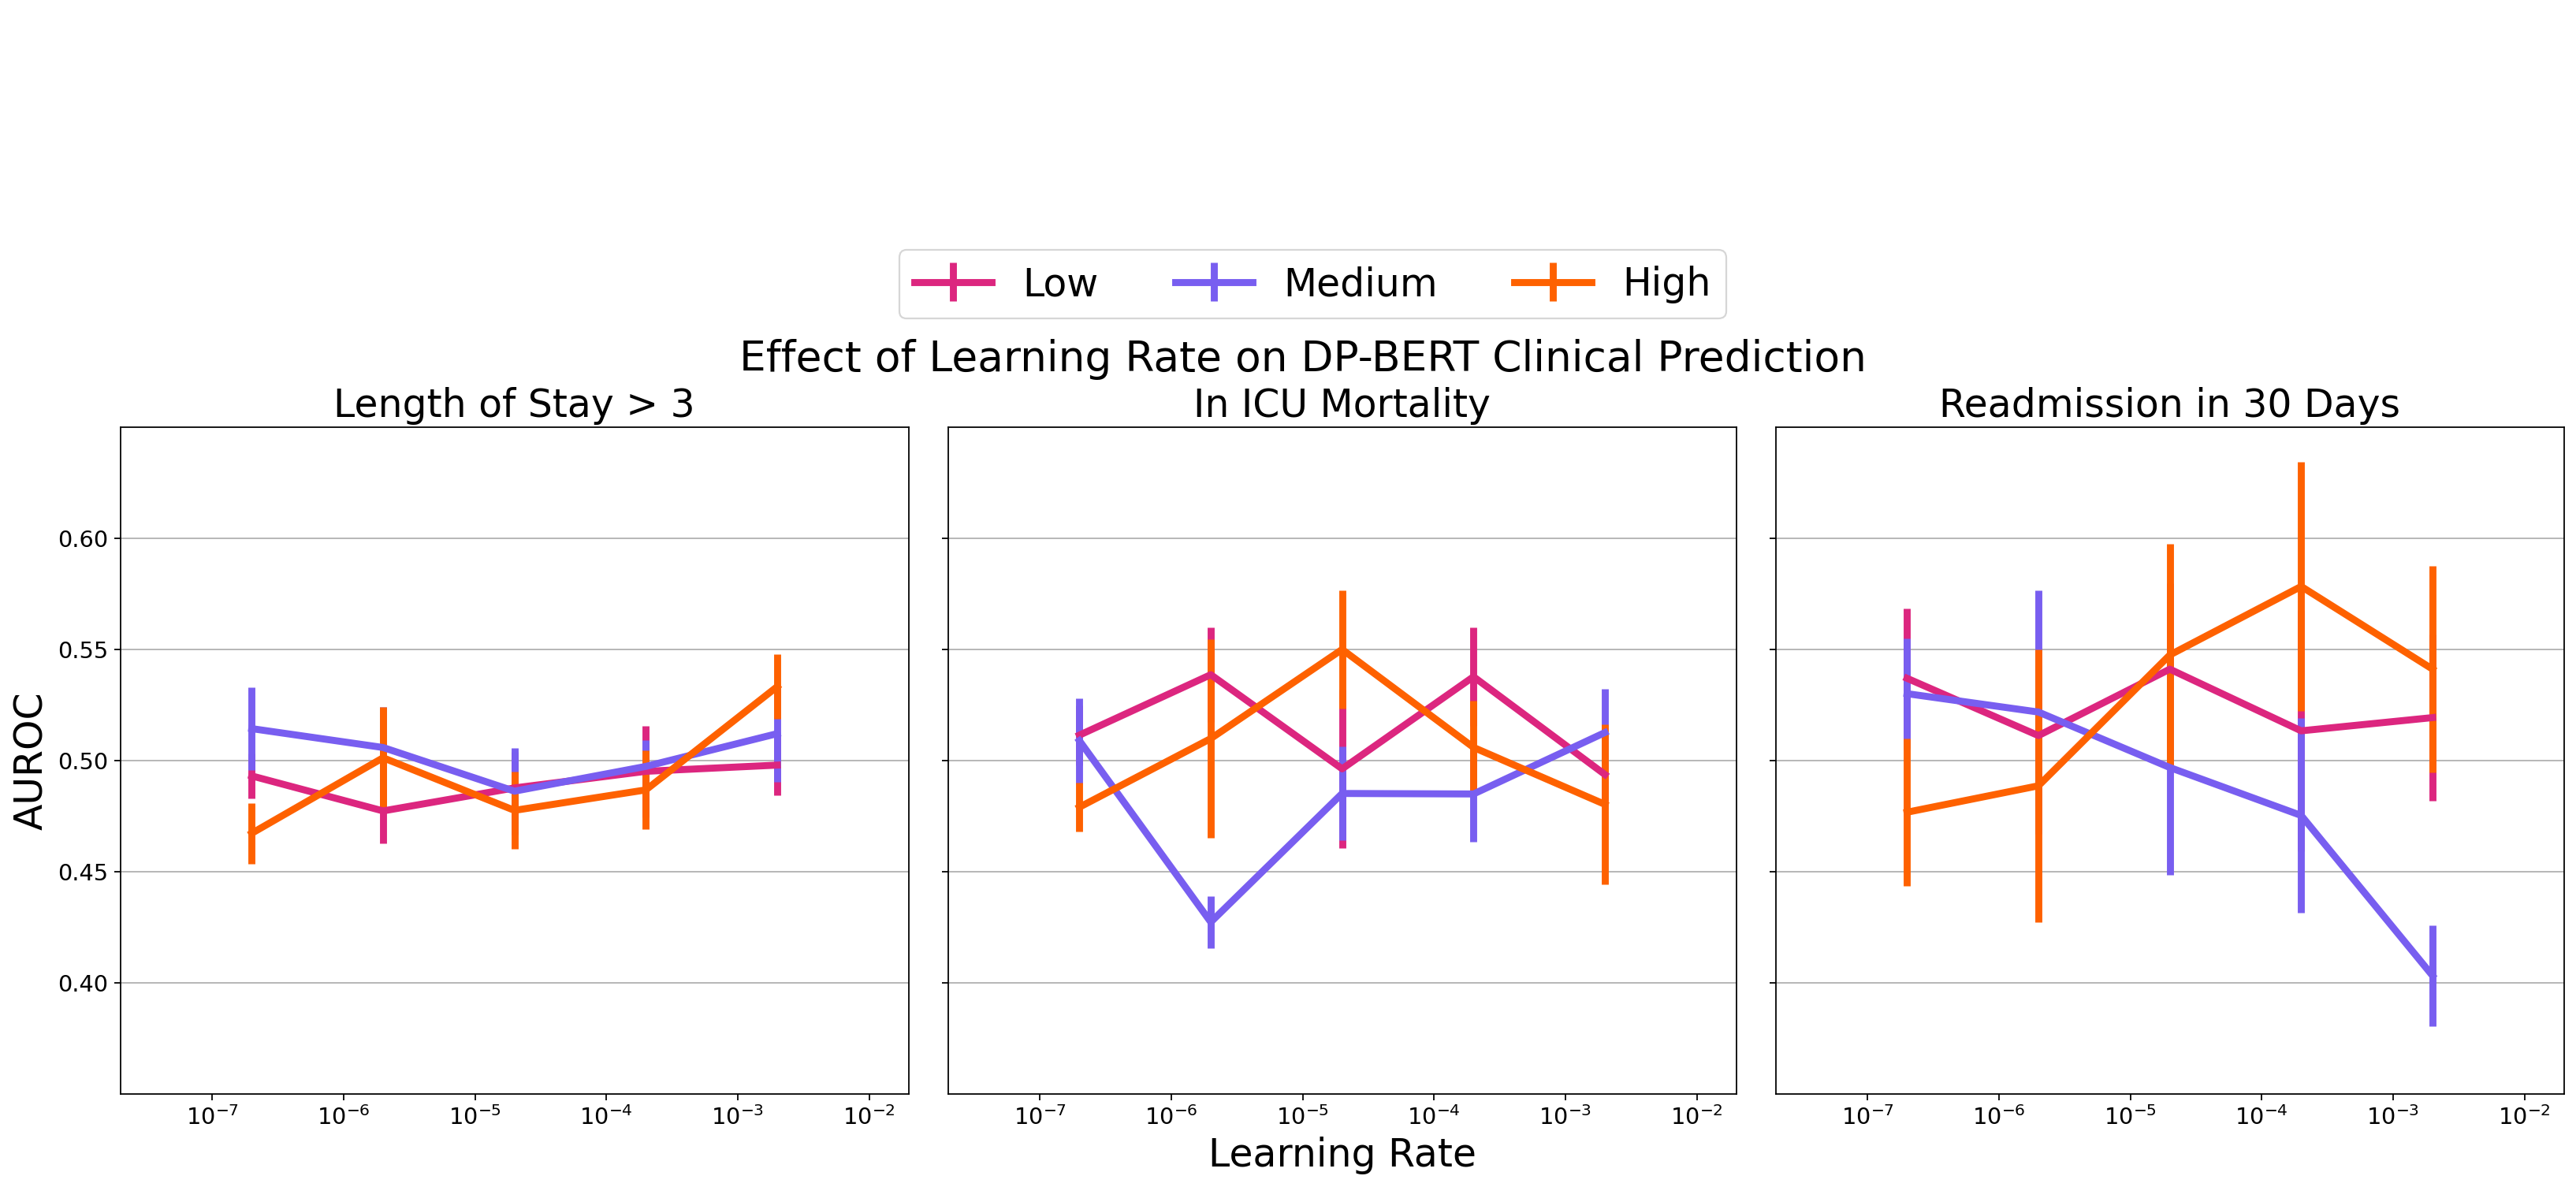

In [215]:
#for ticks
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
minorLocator = MultipleLocator(1)

fig=plt.figure(dpi=200)

fig, axs = plt.subplots(1,
    len(TASKS), sharex=True, sharey=True, figsize=(25, 7), dpi=160, facecolor='w', edgecolor='k'
)
print(axs)
plt.subplots_adjust(wspace=0.05, hspace=0.1)

orig_ticks=axs[0].get_yticks()
print(orig_ticks)
for j in range(len(TASKS)):
    axs[j].set_yticks([])
for i, task in enumerate(TASKS):
    #         for modeltype in ['rf', 'lr', 'svm', 'rbf-svm', 'knn', 'mlp', 'lstm', 'gru']:
#             colours = iter(['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF'])
    #         colours=iter(['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']) #IBM
#             colours=iter(['#648FFF', '#648FFF','#DC267F', '#DC267F', '#785EF0']) #IBM
#             colours=iter(['#332288', '#117733', '#44AA99', '#88CCEE', '#DDCC77', '#CC6677', '#AA4499', '#882255'])#tol
    #         colours=iter(['#332288', '#44AA99', '#CC6677', '#882255'])
            colours=iter(['#DC267F',  '#785EF0', '#FE6100', '#785EF0']) #IBM
            markers=iter(['solid', 'dashed','dashdot','dotted'])
            markers=iter(['solid', 'solid','solid','solid'])
            for l, hyperparameters in enumerate(HYPERPARAMETER_PAIRS):
                    axs[i].set_yticks([0.35, 0.4,0.45,0.5,0.55,0.6, 0.65])
                    axs[i].set_xticks([2e-7, 2e-6, 2e-5, 2e-4,2e-3])
        #             if i == 2: axs[i,j].set_xticklabels([2003, 2005, 2007, 2009, 2011, 2013])
                    axs[i].set_xlim(2e-8, 2e-2)
                    axs[i].set_xscale("log")
                    axs[i].set_ylim([0.35,0.65])
                    axs[i].xaxis.set_minor_locator(minorLocator)
                    try:
                            means=averaged_df.loc[(epoch, slice(None)), (activation, task)][hyperparameters].values
                            print(hyperparameters)
                            print(means)
                            err=ste_df.loc[(epoch, slice(None)), (activation, task)][hyperparameters].values
#                             print(err)
                            c=next(colours)
#                             print(train_type)
                            ending= "-{}".format(str(l))
#                             print(ending)
#                             print(NAMES[train_type])
                            label = NAMES[hyperparameters]
                            gh_plot=axs[i].errorbar(
                                [2e-7, 2e-6, 2e-5, 2e-4,2e-3],means,err, label=label, linewidth=4, color=c, linestyle=next(markers))
                            print(gh_plot)
                    except:
                        pass
        #             # Save just the portion _inside_ the second axis's boundaries
#                     save_name=os.path.abspath("los_3-newplot-{}-AUPRC.png".format(modeltype))
#                     bbox = axs[i].get_tightbbox(fig.canvas.get_renderer())
#                     fig.savefig(save_name,bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))
                    if (i==0):
                        handles=0

                
NAMES = {
    "mort_icu": "In ICU Mortality",
    "los_3": "Length of Stay > 3",
    "readmission_30": "Readmission in 30 Days"
}
for i, modeltype in enumerate(TASKS):
        axs[i].set_yticks([0.4,0.45,0.5,0.55,0.6])
        axs[i].yaxis.grid() # horizontal lines

        
            
        axs[i].tick_params(labelsize=13)
        axs[i].set_title(NAMES[modeltype], fontsize=22)
        axs[0].set_ylabel("AUROC", fontsize=22)
axs[1].set_xlabel("Learning Rate", fontsize=22)
handles, labels = axs[1].get_legend_handles_labels()
ax = fig.add_axes([0.8, 0.9, 0.1, 0.45])
ax.set_axis_off()
print(handles)
print(labels)
fig.legend(handles, labels, loc="upper right", borderaxespad=0.2, bbox_to_anchor=(0.55,1.07), fontsize=22,ncol=5)
fig.suptitle('Effect of Learning Rate on DP-BERT Clinical Prediction', fontsize=24)


plt.savefig('learning_rate_DP_BERT.png', bbox_inches='tight')
plt.show()

## Plot Effect of Epoch Number

In [119]:
TRAIN_STYLES    = ['SGD', 'DP-SGD']
MODEL_TYPES     = ['lr', 'lstm', 'grud']
METRIC = ['AUROC', 'AUPRC']
HYPERPARAMETER_PAIRS = [(15, 0.001), (5.0, 0.01), (1.0, 1.0)]
learning_rate = '2e-5'
EPOCHS = [1,2,3,4,5,6]
activation = "gelu"
NAMES = {
    'SGD': 'SGD',
    'DP-SGD': 'DP-SGD',
    'lr': 'Logistic Regression',
    'lstm': 'LSTM',
    'grud': 'GRU-D',
    (15,0.001): 'Low',
    (5.0,0.01): 'Medium',
    (1.0,1.0): 'High',
}

[0.  0.2 0.4 0.6 0.8 1. ]
[0.49790604 0.46073918 0.47754201 0.45257303 0.49648799 0.50807201]
[0.01756717 0.01880359 0.01731097 0.01496731 0.02687704 0.01429171]
hello
<ErrorbarContainer object of 3 artists>
[0.47372415 0.46176369 0.4861894  0.47460322 0.47715168 0.49609016]
[0.00638302 0.01277442 0.01945312 0.0140689  0.00326346 0.01081745]
hello
<ErrorbarContainer object of 3 artists>
[0.48801171 0.51595369 0.48765024 0.49348074 0.4778885  0.50069726]
[0.01114288 0.01609221 0.0163545  0.02274901 0.01936475 0.00953652]
hello
<ErrorbarContainer object of 3 artists>
[0.44419786 0.4576735  0.54999061 0.4967557  0.53958999 0.48535829]
[0.03142347 0.03812555 0.02645084 0.02646946 0.00960091 0.02064994]
hello
<ErrorbarContainer object of 3 artists>
[0.48674063 0.50545421 0.48515139 0.47613314 0.53945835 0.53238667]
[0.03916845 0.02583537 0.02117446 0.03313199 0.03487038 0.0185397 ]
hello
<ErrorbarContainer object of 3 artists>
[0.49410383 0.49466804 0.49623848 0.46743465 0.50016928 0.534897

<Figure size 1200x800 with 0 Axes>

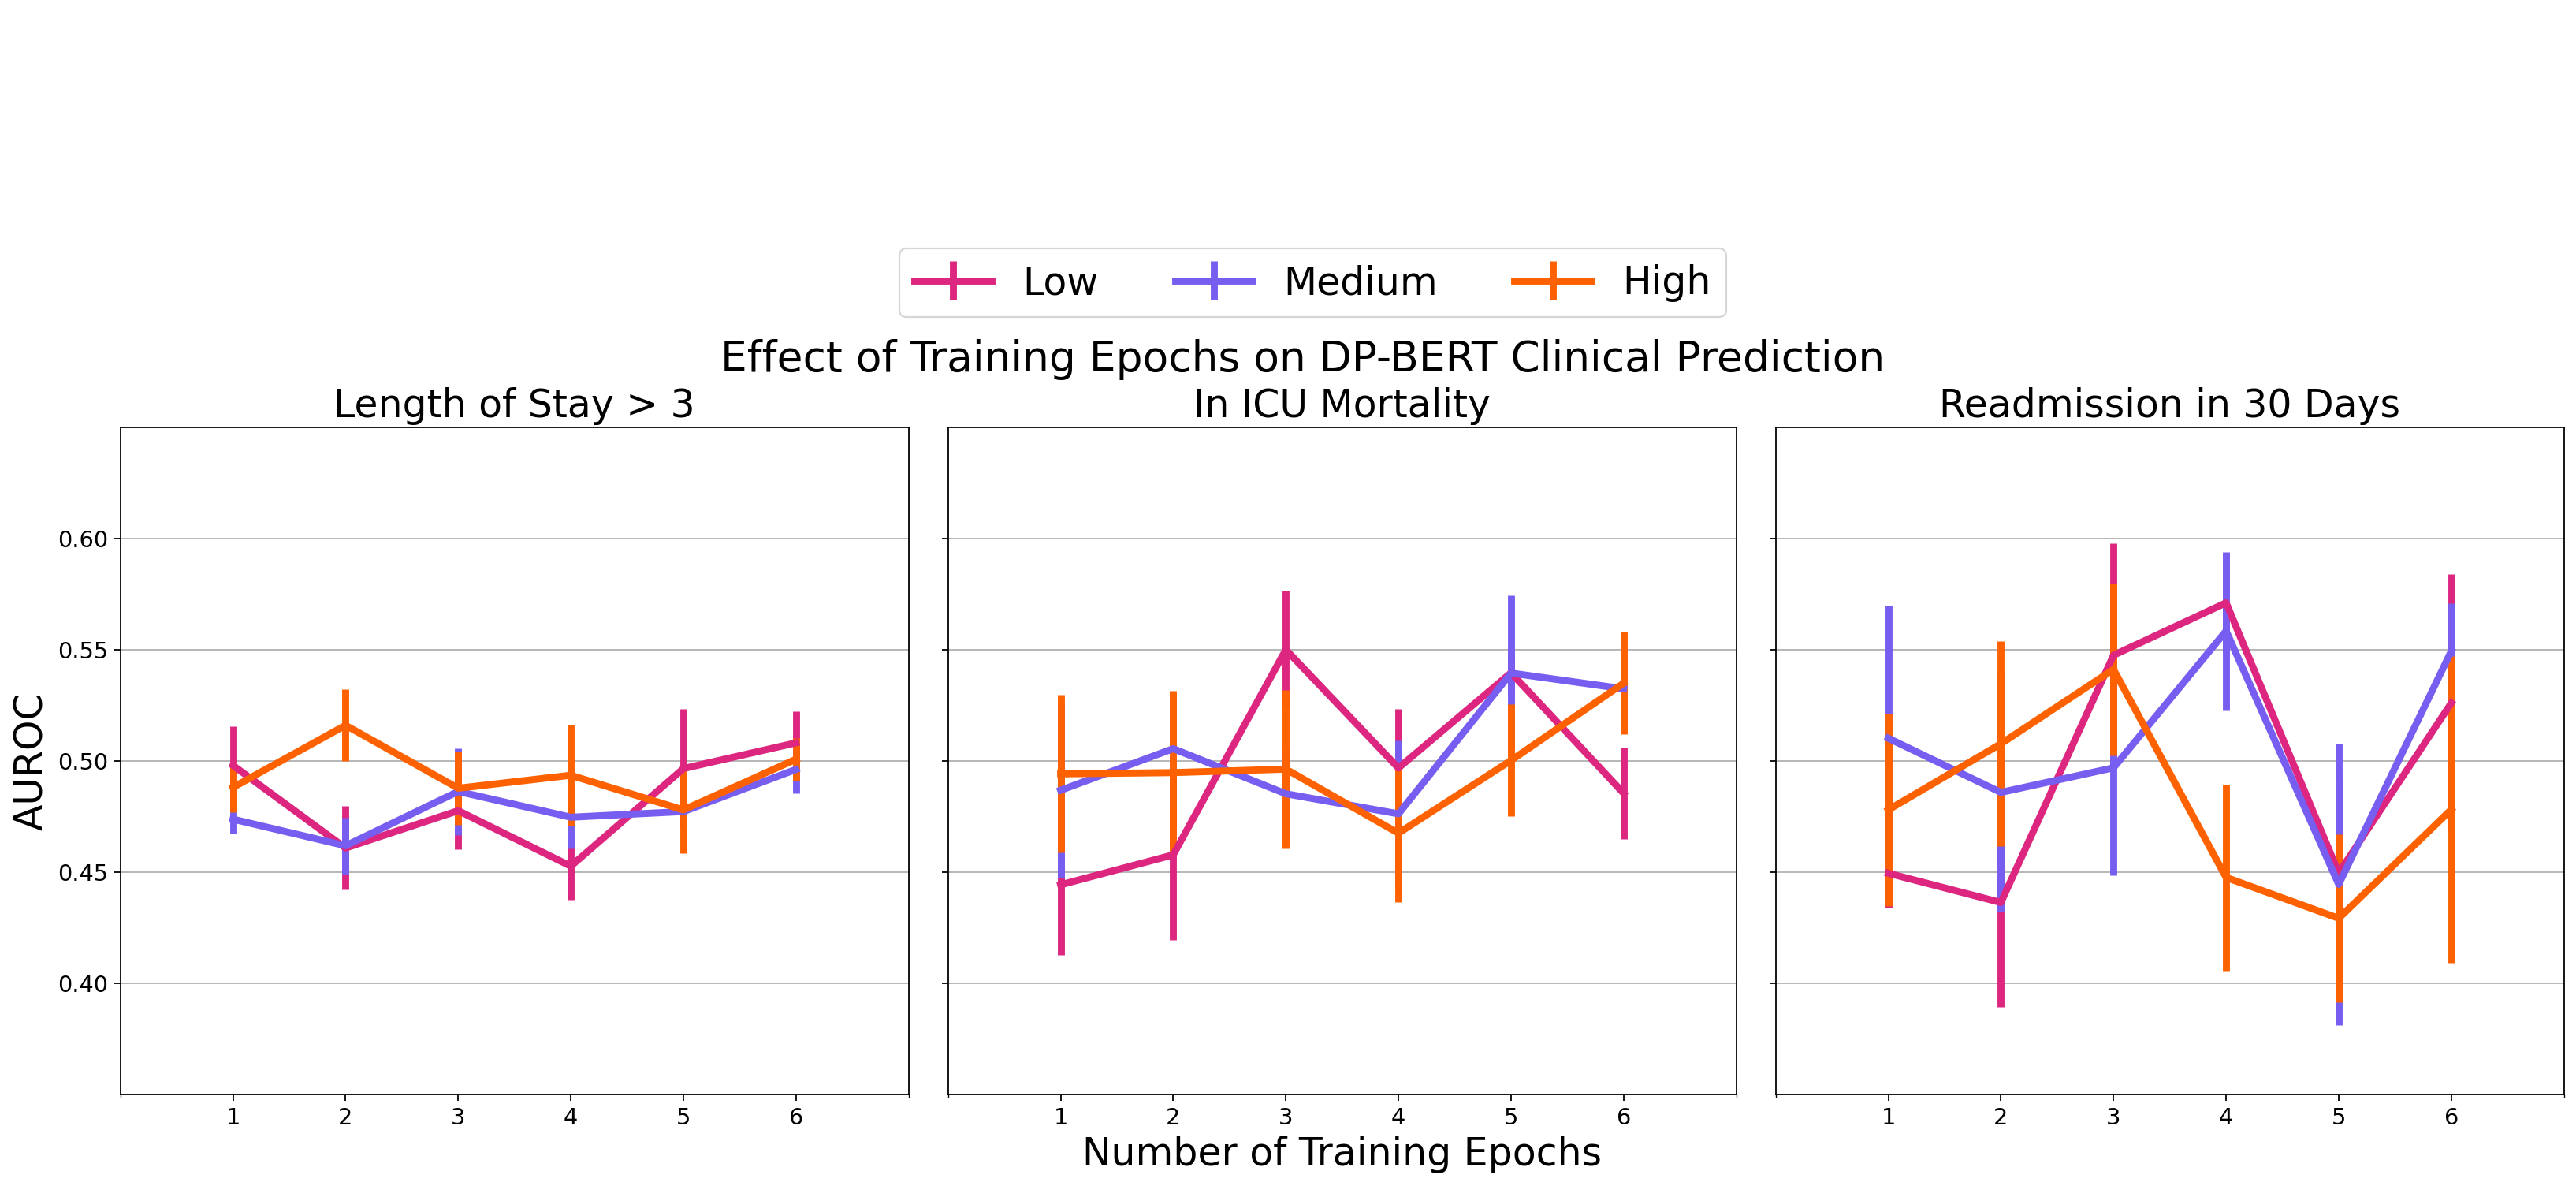

In [120]:
#for ticks
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
minorLocator = MultipleLocator(1)

fig=plt.figure(dpi=200)

fig, axs = plt.subplots(1,
    len(TASKS), sharex=True, sharey=True, figsize=(25, 7), dpi=160, facecolor='w', edgecolor='k'
)
print(axs)
plt.subplots_adjust(wspace=0.05, hspace=0.1)

orig_ticks=axs[0].get_yticks()
print(orig_ticks)
for j in range(len(TASKS)):
    axs[j].set_yticks([])
for i, task in enumerate(TASKS):
    #         for modeltype in ['rf', 'lr', 'svm', 'rbf-svm', 'knn', 'mlp', 'lstm', 'gru']:
#             colours = iter(['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF'])
    #         colours=iter(['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']) #IBM
#             colours=iter(['#648FFF', '#648FFF','#DC267F', '#DC267F', '#785EF0']) #IBM
#             colours=iter(['#332288', '#117733', '#44AA99', '#88CCEE', '#DDCC77', '#CC6677', '#AA4499', '#882255'])#tol
    #         colours=iter(['#332288', '#44AA99', '#CC6677', '#882255'])
            colours=iter(['#DC267F',  '#785EF0', '#FE6100', '#785EF0']) #IBM
            markers=iter(['solid', 'dashed','dashdot','dotted'])
            markers=iter(['solid', 'solid','solid','solid'])
            for l, hyperparameters in enumerate(HYPERPARAMETER_PAIRS):
                    axs[i].set_yticks([0.35, 0.4,0.45,0.5,0.55,0.6, 0.65])
                    axs[i].set_xticks([1,2,3,4,5,6])
        #             if i == 2: axs[i,j].set_xticklabels([2003, 2005, 2007, 2009, 2011, 2013])
                    axs[i].set_xlim(0,7)
                    axs[i].set_ylim([0.35,0.65])
                    axs[i].xaxis.set_minor_locator(minorLocator)
                    try:
                            if l == 2:  
                                means=averaged_df.loc[(learning_rate, slice(None)), ('gelu', task,slice(None))].values.T[-1]
                                err=ste_df.loc[(learning_rate, slice(None)), ('gelu', task,slice(None))].values.T[-1]
                            else:
                                means=averaged_df.loc[(learning_rate, slice(None)), ('gelu', task,slice(None))].values.T[l+1]
                                err=ste_df.loc[(learning_rate, slice(None)), ('gelu', task,slice(None))].values.T[l+1]

                            print(means)
                            
                            print(err)
                            c=next(colours)
#                             print(train_type)
                            ending= "-{}".format(str(l))
                            label = NAMES[hyperparameters]
                            print("hello")
                            gh_plot=axs[i].errorbar(
                                [1,2,3,4,5,6],means,err, label=label, linewidth=4, color=c, linestyle=next(markers))
                            print(gh_plot)
                    except Exception:
                        pass
        #             # Save just the portion _inside_ the second axis's boundaries
#                     save_name=os.path.abspath("los_3-newplot-{}-AUPRC.png".format(modeltype))
#                     bbox = axs[i].get_tightbbox(fig.canvas.get_renderer())
#                     fig.savefig(save_name,bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))
                    if (i==0):
                        handles=0

                
NAMES = {
    "mort_icu": "In ICU Mortality",
    "los_3": "Length of Stay > 3",
    "readmission_30": "Readmission in 30 Days"
}
for i, modeltype in enumerate(TASKS):
        axs[i].set_yticks([0.4,0.45,0.5,0.55,0.6])
        axs[i].yaxis.grid() # horizontal lines

        
            
        axs[i].tick_params(labelsize=13)
        axs[i].set_title(NAMES[modeltype], fontsize=22)
        axs[0].set_ylabel("AUROC", fontsize=22)
axs[1].set_xlabel("Number of Training Epochs", fontsize=22)
handles, labels = axs[1].get_legend_handles_labels()
ax = fig.add_axes([0.8, 0.9, 0.1, 0.45])
ax.set_axis_off()
print(handles)
print(labels)
fig.legend(handles, labels, loc="upper right", borderaxespad=0.2, bbox_to_anchor=(0.55,1.07), fontsize=22,ncol=5)
fig.suptitle('Effect of Training Epochs on DP-BERT Clinical Prediction', fontsize=24)


plt.savefig('training_epochs_DP_BERT.png', bbox_inches='tight')
plt.show()